#**MPOX Skin Lesion**

Dataset has 6 Diseases: -
1. MPox (MKP)
2. ChickenPox (CHP)
3. Measles (MSL)
4. CowPox (CWP)
5. Hand, Foot and Mouth Disease (HFMD)
6. Healthy (HEALTHY)

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("joydippaul/mpox-skin-lesion-dataset-version-20-msld-v20")

print("Path to dataset files:", path)

100%|██████████| 567M/567M [00:04<00:00, 139MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/joydippaul/mpox-skin-lesion-dataset-version-20-msld-v20/versions/4


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation, GlobalAveragePooling2D
from keras.optimizers import Adam, Adamax, Adagrad
from keras.metrics import categorical_crossentropy
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint
# from keras.preprocessing.image import ImageDataGenerator

from keras.applications.resnet import ResNet50, preprocess_input
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input

#**Data Preparation**

In [ ]:
# org_path = '/root/.cache/kagglehub/datasets/joydippaul/mpox-skin-lesion-dataset-version-20-msld-v20/versions/4/Original Images/Original Images/'
# folder_org_path = os.listdir(org_path)
# print("Main Path:-",folder_org_path)

# train_path = []
# test_path = []
# val_path = []

# for folder in folder_org_path:
#   fold_1_path = os.path.join(org_path, folder)   # Path for the image folders
#   fold_1 = os.listdir(fold_1_path)          # shows the sub-folders/files
#   print("Sub-Folder 1:-",fold_1)

#   for f1 in fold_1:
#     fold_2_path = os.path.join(fold_1_path, f1)
#     fold_2 = os.listdir(fold_2_path)
#     print("Sub-Folder 2:-",fold_2)

#     for f2 in fold_2:
#       fold_3_path = os.path.join(fold_2_path, f2)
#       fold_3 = os.listdir(fold_3_path)
#       print("Sub-Folder 3:-",fold_3)

#       for f3 in fold_3:
#         fold_4_path = os.path.join(fold_3_path, f3)
#         fold_4 = os.listdir(fold_4_path)
#         if 'Train' in fold_4_path:
#           train_path.append(fold_4_path)
#         elif 'Test' in fold_4_path:
#           test_path.append(fold_4_path)
#         elif 'Valid' in fold_4_path:
#           val_path.append(fold_4_path)



# # print(train_count)
# # print(test_count)
# # print(val_count)

In [ ]:
# aug_path = '/root/.cache/kagglehub/datasets/joydippaul/mpox-skin-lesion-dataset-version-20-msld-v20/versions/4/Augmented Images/Augmented Images/'
# folder_aug_path = os.listdir(aug_path)
# print("Augmented Path:-",folder_aug_path)

# for folder in folder_aug_path:
#   fold_1_path = os.path.join(aug_path, folder)
#   fold_1 = os.listdir(fold_1_path)
#   print(fold_1)

#   for fa1 in fold_1:
#     folda_2_path = os.path.join(fold_1_path, fa1)
#     folda_2 = os.listdir(folda_2_path)
#     print(folda_2)

#     for fa2 in folda_2:
#       folda_3_path = os.path.join(folda_2_path, fa2)
#       folda_3 = os.listdir(folda_3_path)
#       print(folda_3)

#       for fa3 in folda_3:
#         folda_4_path = os.path.join(folda_3_path, fa3)
#         folda_4 = os.listdir(folda_4_path)
#         train_path.append(folda_4_path)


In [ ]:
org_path = '/root/.cache/kagglehub/datasets/joydippaul/mpox-skin-lesion-dataset-version-20-msld-v20/versions/4/Original Images/Original Images/'
folder_org_path = os.listdir(org_path)
# print("Main Path:-",folder_org_path)

train_data = []
test_data = []
val_data = []

for folder in folder_org_path:
  fold_1_path = os.path.join(org_path, folder)   # Path for the image folders
  fold_1 = os.listdir(fold_1_path)          # shows the sub-folders/files
  # print("Sub-Folder 1:-",fold_1)

  for f1 in fold_1:
    fold_2_path = os.path.join(fold_1_path, f1)
    fold_2 = os.listdir(fold_2_path)
    # print("Sub-Folder 2:-",fold_2)

    for f2 in fold_2:
      fold_3_path = os.path.join(fold_2_path, f2)
      fold_3 = os.listdir(fold_3_path)
      # print("Sub-Folder 3:-",fold_3)

      for f3 in fold_3:
        fold_4_path = os.path.join(fold_3_path, f3)
        fold_4 = os.listdir(fold_4_path)

        for files in fold_4:
          img_path = os.path.join(fold_4_path, files)
          img = cv2.imread(img_path)
          if img is not None:
            img = cv2.resize(img, (224, 224))
          if 'Train' in img_path:
            train_data.append((img, f3))
          elif 'Test' in img_path:
            val_data.append((img, f3))
          elif 'Valid' in img_path:
            val_data.append((img, f3))

print(len(train_data))
print(len(test_data))
print(len(val_data))


2646
0
1129


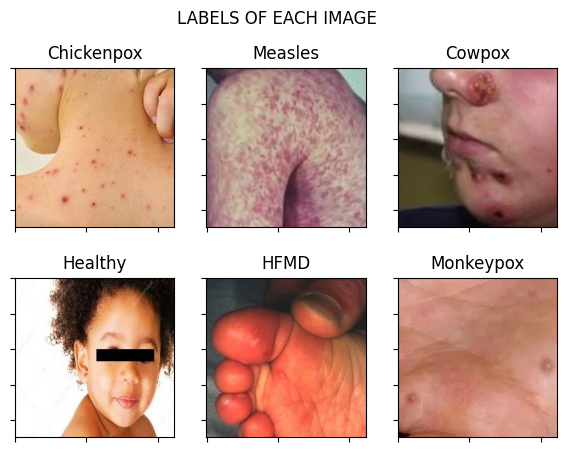

In [ ]:
# Extract unique labels from the training data
unique_labels = set(label for _, label in train_data)

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(7, 5))
plt.suptitle('LABELS OF EACH IMAGE')

# Iterate over unique labels and display one image per label
for label, ax in zip(unique_labels, axes.flatten()):
    # Find the first image with the current label
    img, _ = next((img, lbl) for img, lbl in train_data if lbl == label)

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.grid(False)
    ax.set_title(label)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.show()

#**Model Training - Tranfer Learning**

In [ ]:
train_data[0][0].shape
# train_data[0]

(224, 224, 3)

In [ ]:
from keras.applications.xception import Xception, preprocess_input
xception_model = Xception(weights='imagenet', input_shape=(224,224,3), include_top=False)
xception_model.summary()

In [ ]:
xception_model.trainable = False   # Freezing the weights so that it is not updated during training

In [ ]:
# Adding Dense layers
num_class = 6
x = GlobalAveragePooling2D()(xception_model.output)
x = Dense(512, activation='relu')(x)
predictions = Dense(num_class, activation='softmax')(x)

In [ ]:
model = Model(inputs=xception_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Splitting the images and labels before training
X_train, y_train = zip(*train_data)
X_val, y_val = zip(*val_data)

X_train = preprocess_input(np.array(X_train))
X_val = preprocess_input(np.array(X_val))

label_encoded = LabelEncoder()
y_train_encoded = label_encoded.fit_transform(y_train)
y_val_encoded = label_encoded.transform(y_val)

y_train_one_hot = to_categorical(y_train_encoded, num_class)
y_val_one_hot = to_categorical(y_val_encoded, num_class)

In [ ]:
EPOCHS = 15
BATCH_SIZE = 32
history = model.fit(X_train, y_train_one_hot, epochs = EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val, y_val_one_hot))

Epoch 1/15
83/83 [==============================] - 59s 672ms/step - loss: 0.6395 - accuracy: 0.7748 - val_loss: 0.2804 - val_accuracy: 0.9035
Epoch 2/15
83/83 [==============================] - 54s 655ms/step - loss: 0.1287 - accuracy: 0.9701 - val_loss: 0.0848 - val_accuracy: 0.9894
Epoch 3/15
83/83 [==============================] - 53s 646ms/step - loss: 0.0369 - accuracy: 0.9974 - val_loss: 0.0280 - val_accuracy: 1.0000
Epoch 4/15
83/83 [==============================] - 53s 644ms/step - loss: 0.0150 - accuracy: 1.0000 - val_loss: 0.0119 - val_accuracy: 1.0000
Epoch 5/15
83/83 [==============================] - 53s 644ms/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.0067 - val_accuracy: 1.0000
Epoch 6/15
83/83 [==============================] - 54s 652ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 7/15
83/83 [==============================] - 54s 655ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 1.0000

In [ ]:
train_score = model.evaluate(X_train, y_train_one_hot, verbose= 1)
test_score = model.evaluate(X_val, y_val_one_hot, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

36/36 [==============================] - 16s 441ms/step - loss: 6.4156e-04 - accuracy: 1.0000
Train Loss:  0.0004607394803315401
Train Accuracy:  1.0
--------------------
Test Loss:  0.0006415618117898703
Test Accuracy:  1.0


In [ ]:
model.save('MPox_no_test.keras')

#Plotting

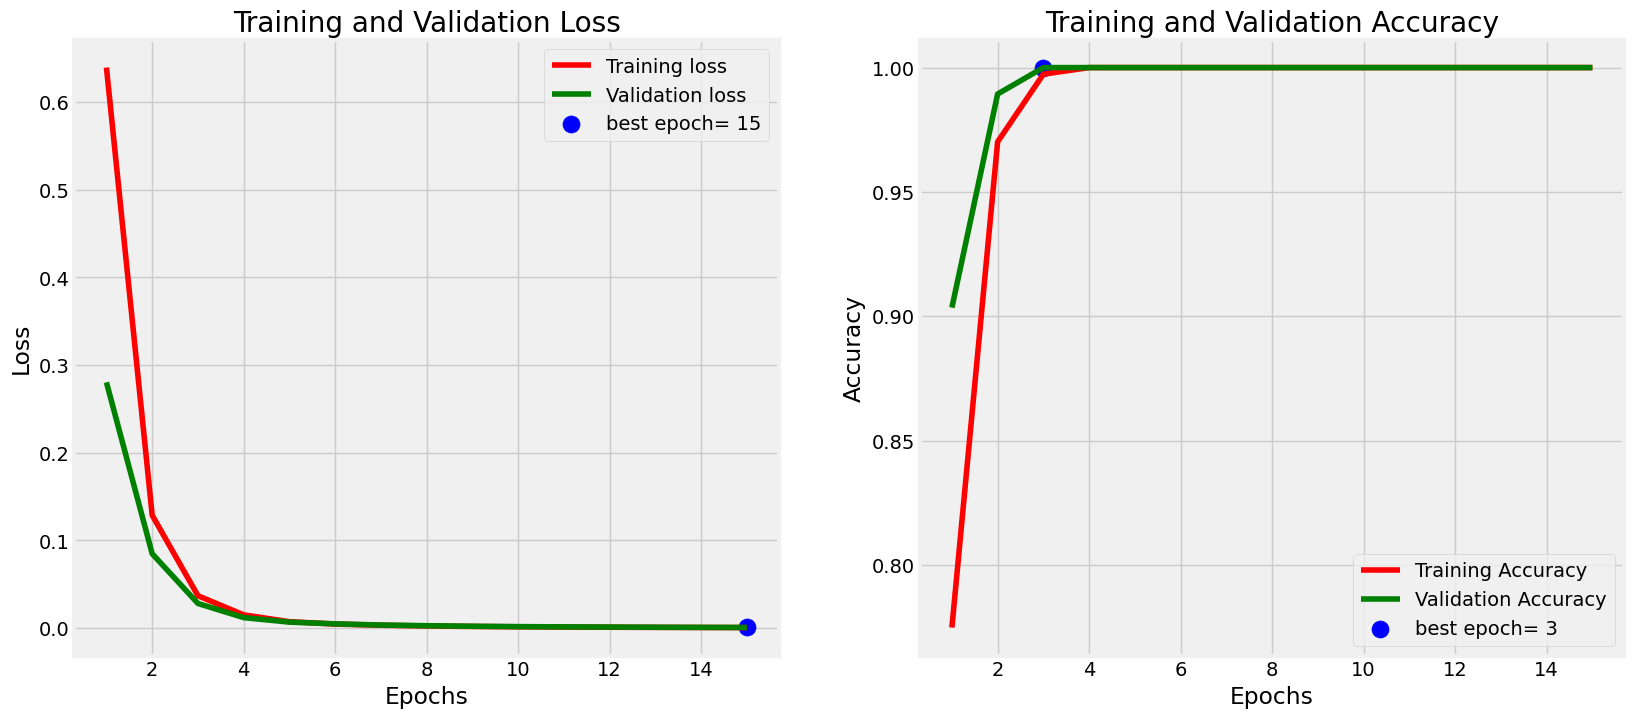

In [ ]:
def plot_training(hist):
    tr_acc = hist.history['accuracy']
    tr_loss = hist.history['loss']
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']
    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]

    plt.figure(figsize= (20, 8))
    plt.style.use('fivethirtyeight')
    Epochs = [i+1 for i in range(len(tr_acc))]
    loss_label = f'best epoch= {str(index_loss + 1)}'
    acc_label = f'best epoch= {str(index_acc + 1)}'

    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
    plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout
    plt.show()

plot_training(history)

#Testing

In [ ]:
class_labels = ['HFMD', 'Cowpox', 'Measles', 'Chickenpox', 'Healthy', 'Monkeypox']

In [ ]:
#Testing

import cv2
img = '/root/.cache/kagglehub/datasets/joydippaul/mpox-skin-lesion-dataset-version-20-msld-v20/versions/4/Original Images/Original Images/FOLDS/fold3/Valid/Monkeypox/MKP_10_01.jpg'
img = cv2.resize(cv2.imread(img), (224,224))
prediction = model.predict(img.reshape(1,224,224,3))
print(prediction.argmax())
print(class_labels[prediction.argmax()])

1/1 [==============================] - 1s 1s/step
5
Monkeypox


#Confusion Matrix

36/36 [==============================] - 16s 449ms/step


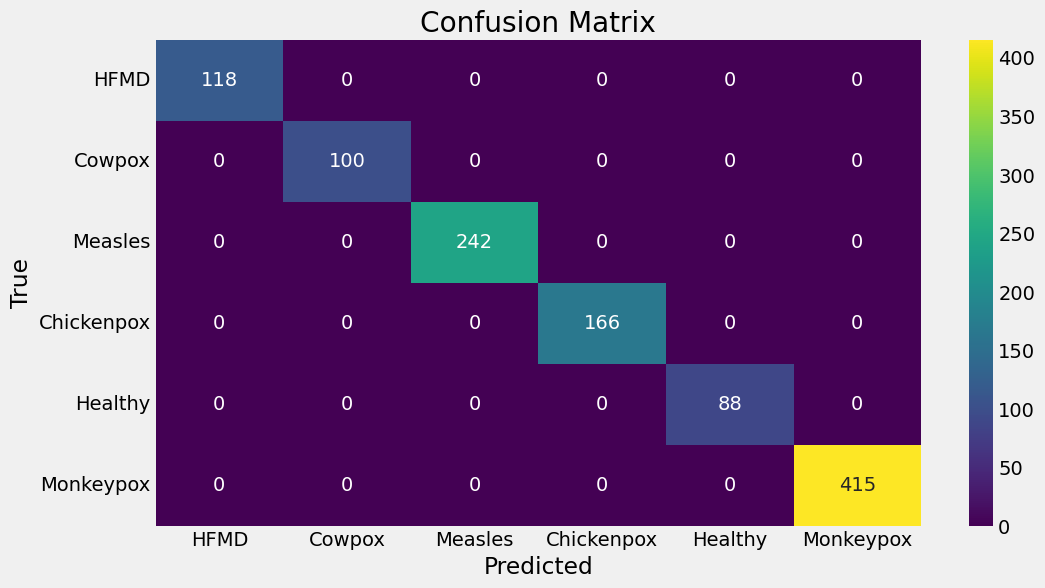

Classification Report:
               precision    recall  f1-score   support

        HFMD       1.00      1.00      1.00       118
      Cowpox       1.00      1.00      1.00       100
     Measles       1.00      1.00      1.00       242
  Chickenpox       1.00      1.00      1.00       166
     Healthy       1.00      1.00      1.00        88
   Monkeypox       1.00      1.00      1.00       415

    accuracy                           1.00      1129
   macro avg       1.00      1.00      1.00      1129
weighted avg       1.00      1.00      1.00      1129



In [ ]:
import seaborn as sns
# Testing Data
X_test, y_test = zip(*val_data)
X_test = preprocess_input(np.array(X_test))
y_test_encoded = label_encoded.transform(y_test)
y_test_one_hot = to_categorical(y_test_encoded, num_class)

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_one_hot, axis=1)

# Generate confusion matrix
conf_mat = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(11, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='viridis', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Display classification report
class_report = classification_report(y_true, y_pred_classes, target_names=class_labels)
print("Classification Report:\n", class_report)

#**InceptionV3**

In [ ]:
resnet_model = InceptionV3(weights='imagenet', input_shape=(224,224,3), include_top=False)
resnet_model.trainable=False

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
# Fully-Connected Layers
num_classes = 6
x = GlobalAveragePooling2D()(resnet_model.output)
x = Dense(512, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

In [ ]:
model = Model(inputs=resnet_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
X_train, y_train = zip(*train_data)
X_val, y_val = zip(*val_data)

X_train = preprocess_input(np.array(X_train))
X_val = preprocess_input(np.array(X_val))

label_enc = LabelEncoder()
y_train_encoded = label_enc.fit_transform(y_train)
y_val_encoded = label_enc.transform(y_val)

y_train_one_hot = to_categorical(y_train_encoded, num_classes)
y_val_one_hot = to_categorical(y_val_encoded, num_classes)

In [ ]:
EPOCHS = 20
BATCH_SIZE = 32
history = model.fit(X_train, y_train_one_hot, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val, y_val_one_hot))

Epoch 1/20
83/83 [==============================] - 29s 303ms/step - loss: 1.0533 - accuracy: 0.6723 - val_loss: 0.5235 - val_accuracy: 0.8237
Epoch 2/20
83/83 [==============================] - 22s 271ms/step - loss: 0.3013 - accuracy: 0.9097 - val_loss: 0.3157 - val_accuracy: 0.8964
Epoch 3/20
83/83 [==============================] - 22s 270ms/step - loss: 0.1189 - accuracy: 0.9754 - val_loss: 0.0819 - val_accuracy: 0.9823
Epoch 4/20
83/83 [==============================] - 22s 262ms/step - loss: 0.0426 - accuracy: 0.9974 - val_loss: 0.0358 - val_accuracy: 0.9965
Epoch 5/20
83/83 [==============================] - 22s 266ms/step - loss: 0.0207 - accuracy: 1.0000 - val_loss: 0.0190 - val_accuracy: 1.0000
Epoch 6/20
83/83 [==============================] - 22s 265ms/step - loss: 0.0121 - accuracy: 1.0000 - val_loss: 0.0128 - val_accuracy: 1.0000
Epoch 7/20
83/83 [==============================] - 22s 263ms/step - loss: 0.0083 - accuracy: 1.0000 - val_loss: 0.0083 - val_accuracy: 1.0000

In [ ]:
train_score = model.evaluate(X_train, y_train_one_hot, verbose= 1)
test_score = model.evaluate(X_val, y_val_one_hot, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

36/36 [==============================] - 7s 186ms/step - loss: 9.1500e-04 - accuracy: 1.0000
Train Loss:  0.0006631602882407606
Train Accuracy:  1.0
--------------------
Test Loss:  0.0009150030091404915
Test Accuracy:  1.0


In [ ]:
model.save('MPox_inceptionv3.keras')

#**MobileNetV2**

In [ ]:
mobile_model = MobileNetV2(weights='imagenet', input_shape=(224,224,3), include_top=False)
mobile_model.trainable=False

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
# Fully-Connected Layers
num_classes = 6
x = GlobalAveragePooling2D()(mobile_model.output)
x = Dense(512, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

In [ ]:
model = Model(inputs=mobile_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
X_train, y_train = zip(*train_data)
X_val, y_val = zip(*val_data)

X_train = preprocess_input(np.array(X_train))
X_val = preprocess_input(np.array(X_val))

label_enc = LabelEncoder()
y_train_encoded = label_enc.fit_transform(y_train)
y_val_encoded = label_enc.transform(y_val)

y_train_one_hot = to_categorical(y_train_encoded, num_classes)
y_val_one_hot = to_categorical(y_val_encoded, num_classes)

In [ ]:
EPOCHS = 20
BATCH_SIZE = 32
history = model.fit(X_train, y_train_one_hot, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val, y_val_one_hot))

Epoch 1/20
83/83 [==============================] - 73s 880ms/step - loss: 0.0513 - accuracy: 0.9947 - val_loss: 0.0627 - val_accuracy: 0.9885
Epoch 2/20
83/83 [==============================] - 71s 861ms/step - loss: 0.0506 - accuracy: 0.9921 - val_loss: 0.0564 - val_accuracy: 0.9920
Epoch 3/20
83/83 [==============================] - 71s 854ms/step - loss: 0.0416 - accuracy: 0.9940 - val_loss: 0.0637 - val_accuracy: 0.9849
Epoch 4/20
83/83 [==============================] - 71s 856ms/step - loss: 0.0355 - accuracy: 0.9966 - val_loss: 0.0560 - val_accuracy: 0.9885
Epoch 5/20
83/83 [==============================] - 71s 860ms/step - loss: 0.0350 - accuracy: 0.9962 - val_loss: 0.0446 - val_accuracy: 0.9911
Epoch 6/20
83/83 [==============================] - 71s 857ms/step - loss: 0.0318 - accuracy: 0.9962 - val_loss: 0.0424 - val_accuracy: 0.9947
Epoch 7/20
83/83 [==============================] - 71s 862ms/step - loss: 0.0265 - accuracy: 0.9985 - val_loss: 0.0310 - val_accuracy: 0.9965

In [ ]:
train_score = model.evaluate(X_train, y_train_one_hot, verbose= 1)
test_score = model.evaluate(X_val, y_val_one_hot, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

36/36 [==============================] - 22s 614ms/step - loss: 0.0154 - accuracy: 0.9965
Train Loss:  0.009295843541622162
Train Accuracy:  0.9996220469474792
--------------------
Test Loss:  0.015426422469317913
Test Accuracy:  0.996457040309906


In [ ]:
model.save("Mpox_mobilenetv2.keras")

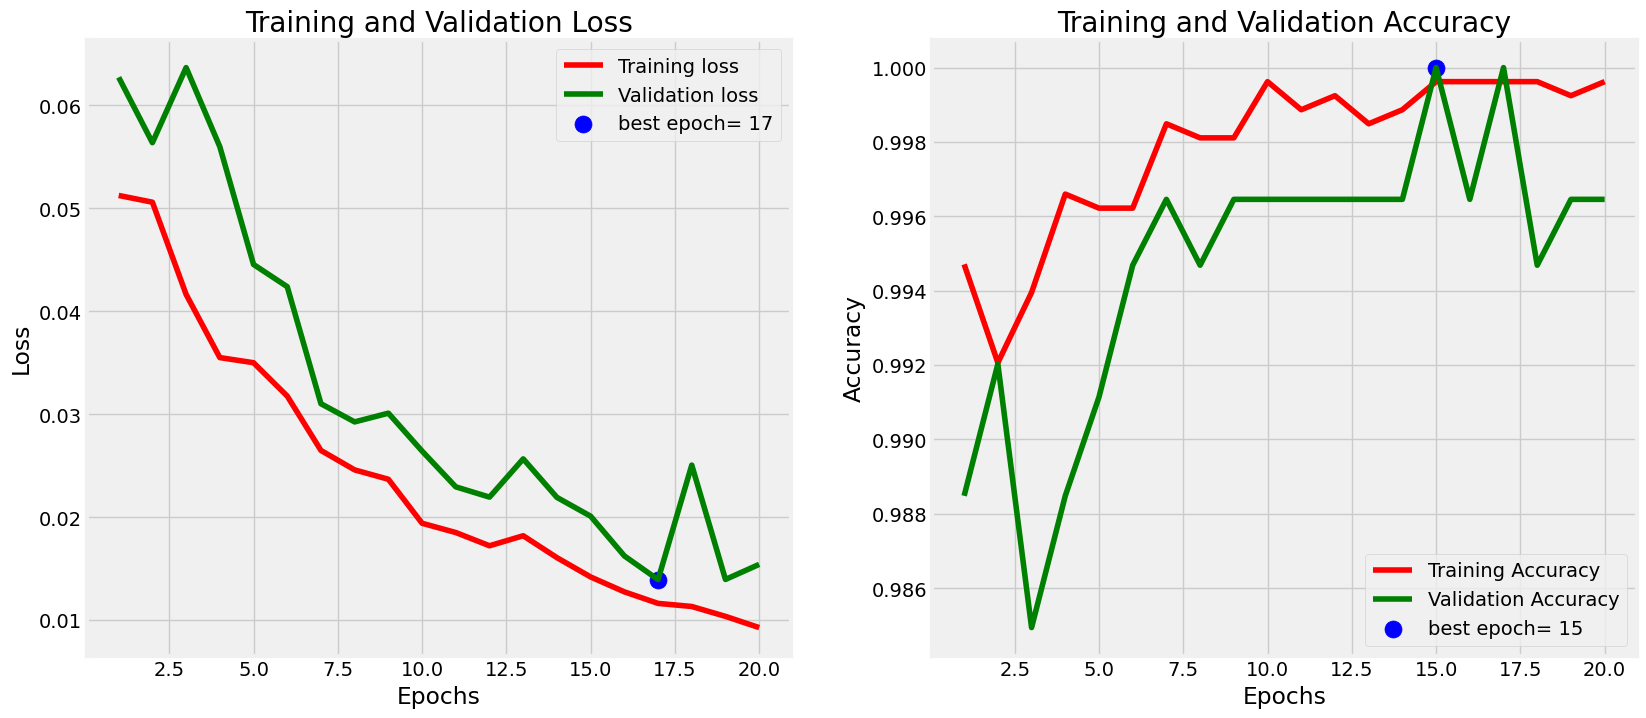

In [ ]:
def plot_training(hist):
    tr_acc = hist.history['accuracy']
    tr_loss = hist.history['loss']
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']
    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]

    plt.figure(figsize= (20, 8))
    plt.style.use('fivethirtyeight')
    Epochs = [i+1 for i in range(len(tr_acc))]
    loss_label = f'best epoch= {str(index_loss + 1)}'
    acc_label = f'best epoch= {str(index_acc + 1)}'

    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
    plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout
    plt.show()

plot_training(history)

In [ ]:
class_labels = ['HFMD', 'Cowpox', 'Measles', 'Chickenpox', 'Healthy', 'Monkeypox']

36/36 [==============================] - 22s 619ms/step


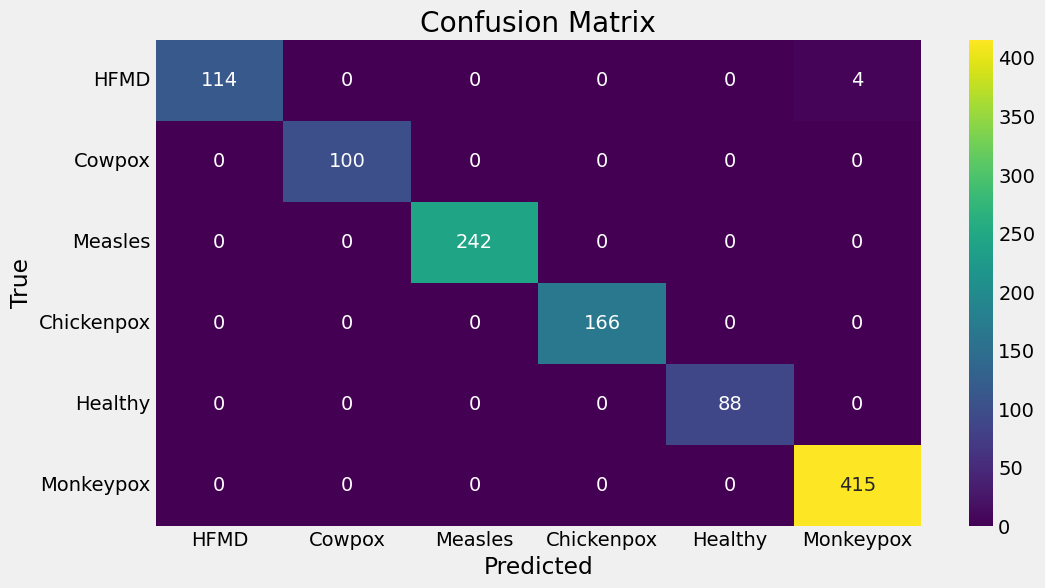

Classification Report:
               precision    recall  f1-score   support

        HFMD       1.00      0.97      0.98       118
      Cowpox       1.00      1.00      1.00       100
     Measles       1.00      1.00      1.00       242
  Chickenpox       1.00      1.00      1.00       166
     Healthy       1.00      1.00      1.00        88
   Monkeypox       0.99      1.00      1.00       415

    accuracy                           1.00      1129
   macro avg       1.00      0.99      1.00      1129
weighted avg       1.00      1.00      1.00      1129



In [ ]:
import seaborn as sns
# Testing Data
X_test, y_test = zip(*val_data)
X_test = preprocess_input(np.array(X_test))
y_test_encoded = label_enc.transform(y_test)
y_test_one_hot = to_categorical(y_test_encoded, num_classes)

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_one_hot, axis=1)

# Generate confusion matrix
conf_mat = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(11, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='viridis', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Display classification report
class_report = classification_report(y_true, y_pred_classes, target_names=class_labels)
print("Classification Report:\n", class_report)

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve, confusion_matrix

# Calculate sensitivity (recall) and specificity for each class
def calculate_metrics(y_true, y_pred):
    # Compute confusion matrix
    # Testing Data
    X_test, y_test = zip(*val_data)
    X_test = preprocess_input(np.array(X_test))
    y_test_encoded = label_enc.transform(y_test)
    y_test_one_hot = to_categorical(y_test_encoded, 6)

# Make predictions
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test_one_hot, axis=1)

# Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred_classes)
    num_classes = cm.shape[0]
    sensitivity = np.zeros(num_classes)
    specificity = np.zeros(num_classes)
    auc_scores = np.zeros(num_classes)

    # Calculate sensitivity and specificity for each class
    for i in range(num_classes):
        tp = cm[i, i]
        fn = np.sum(cm[i, :]) - tp
        fp = np.sum(cm[:, i]) - tp
        tn = np.sum(cm) - (tp + fn + fp)

        sensitivity[i] = tp / (tp + fn)
        specificity[i] = tn / (tn + fp)

        # Calculate AUC for each class
        fpr, tpr, _ = roc_curve(y_true == i, y_pred[:, i])
        auc_scores[i] = roc_auc_score(y_true == i, y_pred[:, i])

    # Compute overall AUC (average over all classes)
    mean_auc = np.mean(auc_scores)

    return sensitivity, specificity, auc_scores, mean_auc

# Use model to predict probabilities on test data
y_pred_proba = model.predict(X_test)

# Get predicted class labels (index of maximum probability)
y_pred = np.argmax(y_pred_proba, axis=1)

# Calculate metrics
sensitivity, specificity, auc_scores, mean_auc = calculate_metrics(y_true, y_pred_proba)

# Print results
class_labels = class_labels

print("Class-wise Sensitivity (Recall):")
for i, label in enumerate(class_labels):
    print(f"{label}: {sensitivity[i]}")
print("Average = ", np.average(sensitivity))

print("\nClass-wise Specificity:")
for i, label in enumerate(class_labels):
    print(f"{label}: {specificity[i]}")
print("Average = ", np.average(specificity))

print("\nClass-wise AUC (Area Under the ROC Curve):")
for i, label in enumerate(class_labels):
    print(f"{label}: {auc_scores[i]}")

print("\nMean AUC (Overall):", mean_auc)


36/36 [==============================] - 23s 628ms/step
Class-wise Sensitivity (Recall):
HFMD: 0.9661016949152542
Cowpox: 1.0
Measles: 1.0
Chickenpox: 1.0
Healthy: 1.0
Monkeypox: 1.0
Average =  0.9943502824858758

Class-wise Specificity:
HFMD: 1.0
Cowpox: 1.0
Measles: 1.0
Chickenpox: 1.0
Healthy: 1.0
Monkeypox: 0.9943977591036415
Average =  0.9990662931839402

Class-wise AUC (Area Under the ROC Curve):
HFMD: 1.0
Cowpox: 1.0
Measles: 1.0
Chickenpox: 1.0
Healthy: 1.0
Monkeypox: 1.0

Mean AUC (Overall): 1.0


#**VGG16**

In [ ]:
vgg_model = VGG16(weights='imagenet', input_shape=(224,224,3), include_top=False)
vgg_model.trainable=False

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# Fully-Connected Layers
num_classes = 6
x = GlobalAveragePooling2D()(vgg_model.output)
x = Dense(512, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

In [ ]:
model = Model(inputs=vgg_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
X_train, y_train = zip(*train_data)
X_val, y_val = zip(*val_data)

X_train = preprocess_input(np.array(X_train))
X_val = preprocess_input(np.array(X_val))

label_enc = LabelEncoder()
y_train_encoded = label_enc.fit_transform(y_train)
y_val_encoded = label_enc.transform(y_val)

y_train_one_hot = to_categorical(y_train_encoded, num_classes)
y_val_one_hot = to_categorical(y_val_encoded, num_classes)

In [ ]:
EPOCHS = 20
BATCH_SIZE = 32
history = model.fit(X_train, y_train_one_hot, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val, y_val_one_hot))

Epoch 1/20
83/83 [==============================] - 74s 885ms/step - loss: 1.1232 - accuracy: 0.5881 - val_loss: 0.8934 - val_accuracy: 0.6829
Epoch 2/20
83/83 [==============================] - 71s 857ms/step - loss: 0.7556 - accuracy: 0.7207 - val_loss: 0.6968 - val_accuracy: 0.7493
Epoch 3/20
83/83 [==============================] - 71s 859ms/step - loss: 0.6139 - accuracy: 0.7865 - val_loss: 0.6130 - val_accuracy: 0.7600
Epoch 4/20
83/83 [==============================] - 71s 859ms/step - loss: 0.5142 - accuracy: 0.8277 - val_loss: 0.5135 - val_accuracy: 0.8202
Epoch 5/20
83/83 [==============================] - 71s 853ms/step - loss: 0.4374 - accuracy: 0.8500 - val_loss: 0.4158 - val_accuracy: 0.8698
Epoch 6/20
83/83 [==============================] - 71s 858ms/step - loss: 0.3660 - accuracy: 0.8862 - val_loss: 0.3661 - val_accuracy: 0.8698
Epoch 7/20
83/83 [==============================] - 71s 858ms/step - loss: 0.3119 - accuracy: 0.9067 - val_loss: 0.3167 - val_accuracy: 0.8955

In [ ]:
train_score = model.evaluate(X_train, y_train_one_hot, verbose= 1)
test_score = model.evaluate(X_val, y_val_one_hot, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

36/36 [==============================] - 21s 594ms/step - loss: 0.0663 - accuracy: 0.9885
Train Loss:  0.0506407767534256
Train Accuracy:  0.9954648613929749
--------------------
Test Loss:  0.06629639118909836
Test Accuracy:  0.9884853959083557


In [ ]:
model.save("Mpox_vgg16.keras")